#SIFT (Scale Invariant Feature Transofrm)

SIFT (Scale-Invariant Feature Transform) este un algoritm folosit în computer vision pentru a detecta și descrie caracteristici locale într-o imagine. A fost introdus de David Lowe în 1999 și este considerat un standard în detectarea punctelor de interes stabile.

 - Detectează puncte cheie (keypoints) în imagine — adică locații semnificative, cum ar fi colțuri, margini sau puncte cu textură distinctivă.

 - Calculează descriptorii — adică o reprezentare numerică (vector) a zonei din jurul fiecărui punct cheie, astfel încât acel punct să poată fi recunoscut și comparat între imagini.

## Caracteristicile SIFT au urmnătoarele proprietăți

 - Invarianță la scară - recunoaște aceleași caracteristici chiar dacă obiectul este mărit sau micșorat.
 - Invarianță la rotație - caracteristicile sunt stabile chiar dacă imaginea este rotită.
 - Rezistent la zgomot și schimbări moderate de iluminare.
 - Ideal pentru compararea imaginilor, potrivire de obiecte, reconstrucție 3D sau urmărire în secvențe video.

In [1]:
!pip install opencv-contrib-python --quiet

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import io

In [3]:
from IPython.display import display
import ipywidgets as widgets

upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

FileUpload(value={}, accept='image/*', description='Upload')

In [4]:
def get_uploaded_image():
    if upload_widget.value:
        upload = list(upload_widget.value.values())[0]
        img_bytes = upload['content']
        pil_image = Image.open(io.BytesIO(img_bytes)).convert('RGB')
        return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    return None

In [5]:
def show_sift(img):
    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Draw keypoints
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None,
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

    # Show image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(f'SIFT Keypoints (count: {len(keypoints)})')
    plt.axis('off')
    plt.show()

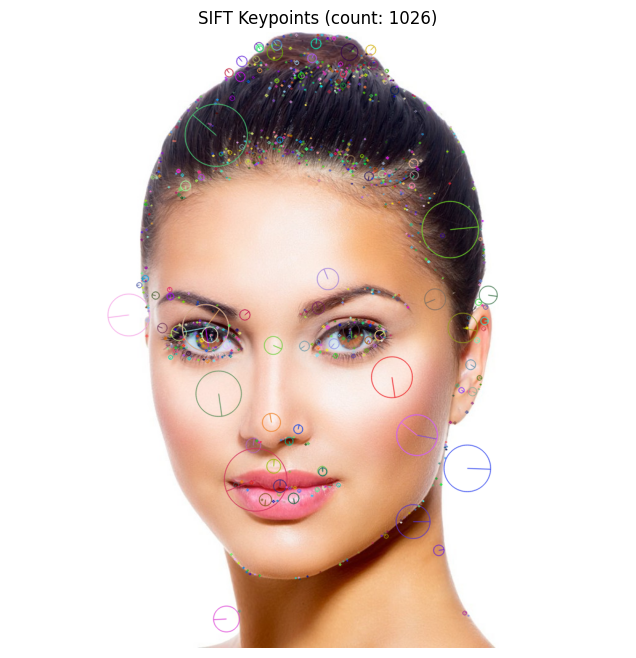

In [6]:
img = get_uploaded_image()
if img is not None:
    show_sift(img)
else:
    print("Please upload an image above.")